In [2]:
suppressWarnings(suppressMessages({
    library(Signac)
    library(Seurat)
    library(EnsDb.Mmusculus.v79)
    library(tidyverse)
    library(SingleR)
}))
set.seed(1)
color_protocol <- c("#0067AA","#FF7F00","#00A23F","#FF1F1D","#A763AC","#B45B5D","#FF8AB6","#B6B800","#01C1CC","#85D5F8","#FFC981","#C8571B","#727272","#EFC800","#8A5626","#502E91","#59A4CE","#344B2B","#FBE29D","#FDD6E6","#849C8C","#F07C6F","#000101")

In [ ]:
rds = readRDS("/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20231109sgr_mouse_cutoff/A0920_3_ME_YSPB_WX_D_T7_EDTA5030//02.atac//Result/Analysis/A0920_3_ME_YSPB_WX_D_T7_EDTA5030//A0920_3_ME_YSPB_WX_D_T7_EDTA5030_scATAC_Object.rds")

In [ ]:
head(rds$ATAC)

In [ ]:
rds1 = readRDS("/SGRNJ06/randd/USER/cjj/celedev/atac/20231109dzh/A1017_3_ML_YSPB_WX_R_T7_EDTA5030_outdir/mouse.rds")

In [ ]:
pbmc.ATAC.res_10x$ATAC

In [ ]:
rds$ATAC

In [ ]:
combined <- merge(rds$ATAC, y = pbmc.ATAC.res_10x$ATAC, add.cell.ids = c("sgr", "tenx"), project = "mouse")

In [ ]:
head(combined)

In [ ]:
combined@meta.data

In [ ]:
combined@meta.data$sample = (sapply(X = strsplit(colnames(combined), split = "_"), FUN = "[", 1))

In [ ]:
PRO <-  NormalizeData(object = combined)
PRO <-  ScaleData(object = PRO)
PRO <- FindVariableFeatures(object = PRO)
genes.use<- head(HVFInfo(object = PRO),2000)
PRO <- RunPCA(object=PRO,features = VariableFeatures(object = PRO))
PRO <- RunHarmony(PRO,group.by="sample" , plot_convergence = TRUE)
PRO <- FindNeighbors(PRO, reduction = "harmony", dims = 1:20)
PRO <- FindClusters(PRO,resolution = 0.8, algorithm = 1)
PRO <- RunUMAP(PRO, reduction = "harmony", dims = 1:20)
PRO <- RunTSNE(object=PRO,reduction = "harmony",dims.use=1:20,do.fast=TRUE,check_duplicates = FALSE)

In [ ]:
?merge

In [ ]:
# merge 10x and sgr

In [1]:
library(MAESTRO)
library(Seurat)
library(Signac)

Possible Ensembl SSL connectivity problems detected.
Please see the 'Connection Troubleshooting' section of the biomaRt vignette
vignette('accessing_ensembl', package = 'biomaRt')Error in curl::curl_fetch_memory(url, handle = handle) : 
  SSL certificate problem: certificate has expired


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching SeuratObject


Attaching package: 'Signac'


The following object is masked from 'package:Seurat':

    FoldChange




In [3]:
rds_10x = "/SGRNJ06/randd/PROJECT/scATAC/20230925_959595_H_EM_sc/A0920_3_ME_YSPB_WX_D_T7_EDTA5030/03.atac/A0920_3_ME_YSPB_WX_D_T7_EDTA5030/outs/filtered_peak_bc_matrix.h5"

In [4]:
rds_sgr = "/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20231109sgr_mouse_cutoff/A0920_3_ME_YSPB_WX_D_T7_EDTA5030/02.atac/Result/QC/A0920_3_ME_YSPB_WX_D_T7_EDTA5030//A0920_3_ME_YSPB_WX_D_T7_EDTA5030_filtered_peak_count.h5"

In [5]:
rds_10x = Read10X_h5(rds_10x)

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


In [6]:
rds_sgr = Read10X_h5(rds_sgr)

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


In [ ]:
?ATACRunSeurat

In [ ]:
pbmc.ATAC.res_10x <- ATACRunSeurat(inputMat = rds_10x,
                                 project = "rds_10x",
                                 min.c = 10,
                                 min.p = 100,
                                 method = "LSI",
                                 dims.use = 1:20,
                                 cluster.res = 0.8,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = './')

In [ ]:
pbmc.ATAC.res_sgr <- ATACRunSeurat(inputMat = rds_sgr,
                                 project = "rds_sgr",
                                 min.c = 10,
                                 min.p = 100,
                                 method = "LSI",
                                 dims.use = 1:20,
                                 cluster.res = 0.8,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = './')

In [ ]:
pbmc.ATAC.res_10x$ATAC@meta.data

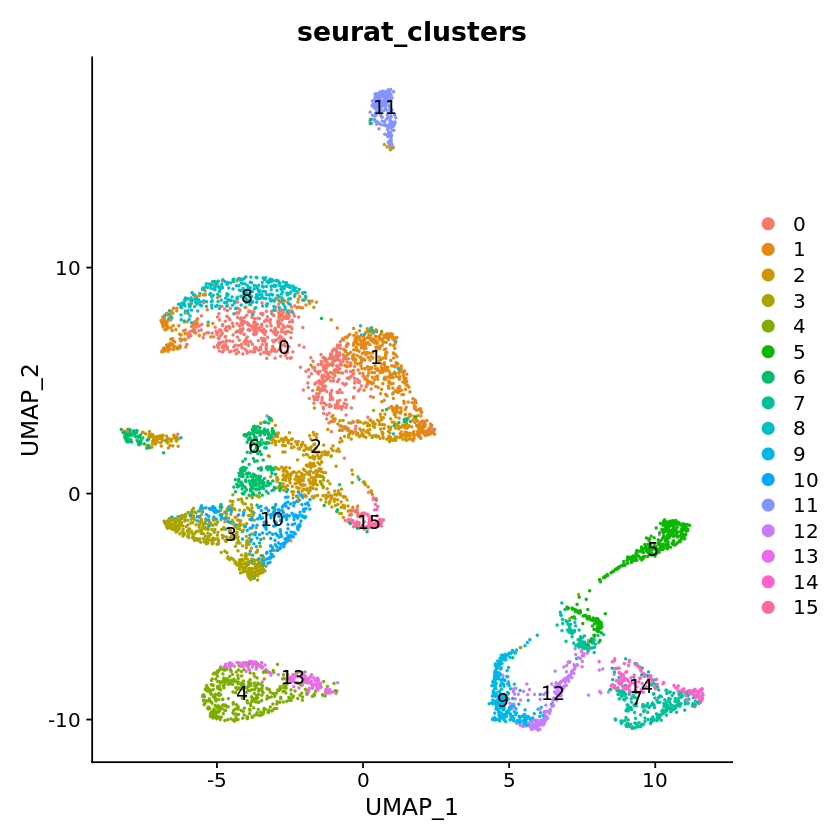

In [26]:
DimPlot(object = pbmc.ATAC.res_10x$ATAC, reduction = "umap",label = TRUE, group.by = "seurat_clusters")

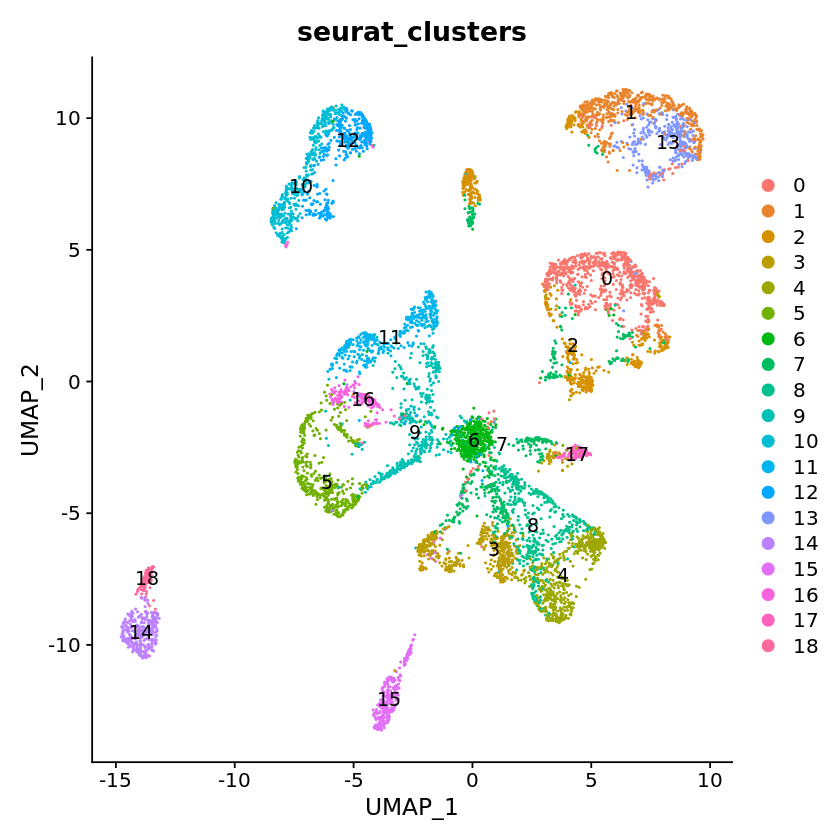

In [25]:
DimPlot(object = pbmc.ATAC.res_sgr$ATAC, reduction = "umap",label = TRUE, group.by = "seurat_clusters")

In [27]:
combined <- merge(pbmc.ATAC.res_10x$ATAC, y = pbmc.ATAC.res_sgr$ATAC, add.cell.ids = c("sgr", "tenx"), project = "mouse")

In [ ]:
combined@meta.data

In [29]:
combined@meta.data$sample = (sapply(X = strsplit(colnames(combined), split = "_"), FUN = "[", 1))

In [ ]:
#PRO <-  NormalizeData(object = combined)
PRO <-  ScaleData(object = combined)
PRO <- FindVariableFeatures(object = PRO)
# genes.use<- head(HVFInfo(object = PRO),2000)
PRO <- RunPCA(object=PRO)
PRO <- FindNeighbors(PRO, reduction = "pca", dims = 1:20)
PRO <- FindClusters(PRO,resolution = 0.6)
PRO <- RunUMAP(PRO, reduction = "pca", dims = 1:20)
PRO <- RunTSNE(object=PRO,reduction = "pca",dims.use=1:20,do.fast=TRUE,check_duplicates = FALSE)

In [1]:
DimPlot(object = PRO, reduction = "umap",label = TRUE, group.by = "sample")

ERROR: Error in DimPlot(object = PRO, reduction = "tsne", label = TRUE, group.by = "sample"): could not find function "DimPlot"


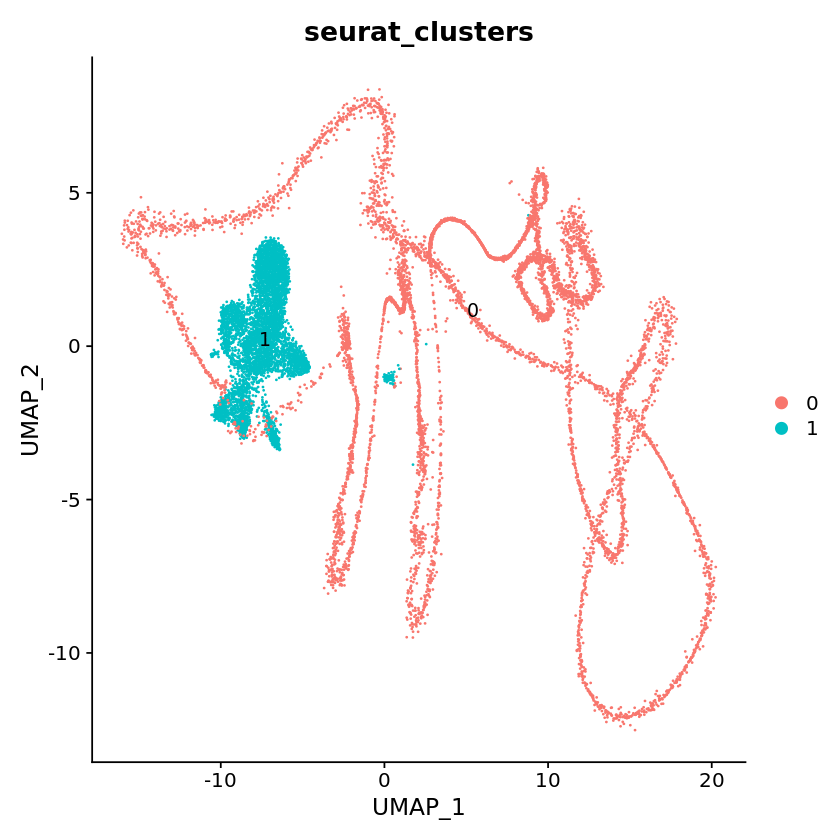

In [40]:
DimPlot(object = PRO, reduction = "umap",label = TRUE, group.by = "seurat_clusters")

In [ ]:
saveRDS(pbmc.ATAC.res_10x, "./temp.rds")

In [ ]:
saveRDS(pbmc.ATAC.res_sgr, "./temp1.rds")

In [ ]:
# merge 10x and sgr
library(harmony)
library(Seurat)
library(Signac)

In [ ]:
#rds = readRDS("/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20231109sgr_mouse_cutoff/A0920_3_ME_YSPB_WX_D_T7_EDTA5030//02.atac//Result/Analysis/A0920_3_ME_YSPB_WX_D_T7_EDTA5030//A0920_3_ME_YSPB_WX_D_T7_EDTA5030_scATAC_Object.rds")
rds = readRDS("temp1.rds")

In [ ]:
rds1 = readRDS("temp.rds")
#rds1 = readRDS("/SGRNJ06/randd/USER/cjj/celedev/atac/20231115merge_10x10x/A0920_3_ME_YSPB_WX_D_T7_EDTA5030_outdir/mouse.rds")

In [ ]:
rds$ATAC

In [ ]:
rds1

In [ ]:
combined <- merge(rds$ATAC, y = rds1$ATAC, add.cell.ids = c("sgr", "tenx"), project = "mouse")

In [ ]:
head(combined)

In [ ]:
combined@meta.data

In [ ]:
combined@meta.data$sample = (sapply(X = strsplit(colnames(combined), split = "_"), FUN = "[", 1))

In [ ]:
PRO <-  NormalizeData(object = combined)
PRO <-  ScaleData(object = PRO)
PRO <- FindVariableFeatures(object = PRO)
genes.use<- head(HVFInfo(object = PRO),2000)
PRO <- RunPCA(object=PRO,features = VariableFeatures(object = PRO))
PRO <- RunHarmony(PRO,group.by="sample" , plot_convergence = TRUE)
PRO <- FindNeighbors(PRO, reduction = "harmony", dims = 1:20)
PRO <- FindClusters(PRO,resolution = 0.8, algorithm = 1)
PRO <- RunUMAP(PRO, reduction = "harmony", dims = 1:20)
PRO <- RunTSNE(object=PRO,reduction = "harmony",dims.use=1:20,do.fast=TRUE,check_duplicates = FALSE)

In [ ]:
DimPlot(object = PRO, reduction = "harmony",label = TRUE, group.by = "sample")

In [ ]:
DimPlot(object = PRO, reduction = "harmony",label = TRUE, group.by = "seurat_clusters")

In [ ]:
library(stringr)

In [ ]:
outP1 = stringr::str_glue("/SGRNJ06/randd/USER/cjj/celedev/atac/20231115merge_10xsgr/sample.png")
png(outP1, height=1000, width=1000)
TSNEPlot(PRO,group.by='sample',label=TRUE)
dev.off()

In [ ]:
outP1 = stringr::str_glue("/SGRNJ06/randd/USER/cjj/celedev/atac/20231115merge_10xsgr/cluster.png")
png(outP1, height=1000, width=1000)
TSNEPlot(PRO,group.by='seurat_clusters',label=TRUE)
dev.off()

In [ ]:
# merge 10x and 10x

In [ ]:
library(MAESTRO)
library(Seurat)
library(Signac)

In [ ]:
rds = "/SGRNJ06/randd/PROJECT/scATAC/20230925_959595_H_EM_sc/A0920_4_ME_YSPB_WX_R_T7_EDTA5030/03.atac/A0920_4_ME_YSPB_WX_R_T7_EDTA5030/outs/filtered_peak_bc_matrix.h5"

In [ ]:
rds1 = "/SGRNJ06/randd/PROJECT/scATAC/20230925_959595_H_EM_sc/A0920_3_ME_YSPB_WX_D_T7_EDTA5030/03.atac/A0920_3_ME_YSPB_WX_D_T7_EDTA5030/outs/filtered_peak_bc_matrix.h5"

In [ ]:
rds = Read10X_h5(rds)

In [ ]:
rds1 = Read10X_h5(rds1)

In [ ]:
rds <- ATACRunSeurat(inputMat = rds,
                                 project = "rds_10x",
                                 min.c = 50,
                                 min.p = 500,
                                 method = "LSI",
                                 dims.use = 1:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = './')

In [ ]:
saveRDS(rds, "./temp.rds")

In [ ]:
rds1 <- ATACRunSeurat(inputMat = rds1,
                                 project = "rds_10x",
                                 min.c = 50,
                                 min.p = 500,
                                 method = "LSI",
                                 dims.use = 1:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = './')

In [ ]:
saveRDS(rds1, "./temp1.rds")

In [ ]:
library(harmony)
library(Seurat)
library(Signac)
library(stringr)

In [ ]:
rds = readRDS("temp.rds")

In [ ]:
rds1 = readRDS("temp1.rds")

In [ ]:
combined <- merge(rds$ATAC, y = rds1$ATAC, add.cell.ids = c("A09204", "A09203"), project = "mouse")

In [ ]:
head(combined)

In [ ]:
combined@meta.data

In [ ]:
combined@meta.data$sample = (sapply(X = strsplit(colnames(combined), split = "_"), FUN = "[", 1))

In [ ]:
combined@meta.data

In [ ]:
PRO <-  NormalizeData(object = combined)
PRO <-  ScaleData(object = PRO)
PRO <- FindVariableFeatures(object = PRO)
genes.use<- head(HVFInfo(object = PRO),2000)
PRO <- RunPCA(object=PRO,features = VariableFeatures(object = PRO))
PRO <- RunHarmony(PRO,group.by="sample" , plot_convergence = TRUE)
PRO <- FindNeighbors(PRO, reduction = "harmony", dims = 1:20)
PRO <- FindClusters(PRO,resolution = 0.8, algorithm = 1)
PRO <- RunUMAP(PRO, reduction = "harmony", dims = 1:20)
PRO <- RunTSNE(object=PRO,reduction = "harmony",dims.use=1:20,do.fast=TRUE,check_duplicates = FALSE)

In [ ]:
DimPlot(object = PRO, reduction = "umap",label = TRUE, group.by = "sample")

In [ ]:
DimPlot(object = PRO, reduction = "umap",label = TRUE, group.by = "seurat_clusters")

In [ ]:
outP1 = stringr::str_glue("/SGRNJ06/randd/USER/cjj/celedev/atac/20231115merge_10xsgr/sample.png")
png(outP1, height=1000, width=1000)
TSNEPlot(PRO,group.by='sample',label=TRUE)
dev.off()

In [ ]:
outP1 = stringr::str_glue("/SGRNJ06/randd/USER/cjj/celedev/atac/20231115merge_10xsgr/sample.png")
png(outP1, height=1000, width=1000)
TSNEPlot(PRO,group.by='sample',label=TRUE)
dev.off()

In [ ]:
# merge 10x and 10x
library(harmony)
library(Seurat)
library(Signac)

In [ ]:
rds = readRDS("/SGRNJ06/randd/USER/cjj/celedev/atac/20231115merge_10x10x//A0920_4_ME_YSPB_WX_R_T7_EDTA5030_outdir/mouse.rds")
rds1 = readRDS("/SGRNJ06/randd/USER/cjj/celedev/atac/20231115merge_10x10x/A0920_3_ME_YSPB_WX_D_T7_EDTA5030_outdir/mouse.rds")
combined <- merge(rds, y = c(rds1), add.cell.ids = c("A09204", "A09203"), project = "mouse")
unique(sapply(X = strsplit(colnames(combined), split = "_"), FUN = "[", 1))
combined@meta.data$sample = (sapply(X = strsplit(colnames(combined), split = "_"), FUN = "[", 1))

In [ ]:
PRO <-  NormalizeData(object = combined)
PRO <-  ScaleData(object = PRO)
PRO <- FindVariableFeatures(object = PRO)
genes.use<- head(HVFInfo(object = PRO),2000)
PRO <- RunPCA(object=PRO,features = VariableFeatures(object = PRO))
PRO <- RunHarmony(PRO,group.by="sample" , plot_convergence = TRUE)
PRO <- FindNeighbors(PRO, reduction = "harmony", dims = 1:20)
PRO <- FindClusters(PRO,resolution = 0.8, algorithm = 1)
PRO <- RunUMAP(PRO, reduction = "harmony", dims = 1:20)
PRO <- RunTSNE(object=PRO,reduction = "harmony",dims.use=1:20,do.fast=TRUE,check_duplicates = FALSE)

In [ ]:
DimPlot(object = PRO, reduction = "umap", label = TRUE, group.by = "sample")

In [ ]:
head(PRO@meta.data)

In [ ]:
outP1 = stringr::str_glue("/SGRNJ06/randd/USER/cjj/celedev/atac/20231115merge_10x10x/sample.png")
png(outP1, height=1000, width=1000)
UMAPPlot(PRO,group.by='sample',label=TRUE)
dev.off()

In [ ]:
outP1 = stringr::str_glue("/SGRNJ06/randd/USER/cjj/celedev/atac/20231115merge_10x10x/cluster.png")
png(outP1, height=1000, width=1000)
UMAPPlot(PRO,group.by='seurat_clusters',label=TRUE)
dev.off()

In [ ]:
df <- Read10X_h5("/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20231109sgr_mouse_cutoff/A0920_3_ME_YSPB_WX_D_T7_EDTA5030/02.atac/Result/QC/A0920_3_ME_YSPB_WX_D_T7_EDTA5030/A0920_3_ME_YSPB_WX_D_T7_EDTA5030_filtered_peak_count.h5")

In [ ]:
df <- as.data.frame(colSums(df))

In [ ]:
df

In [ ]:
df$barcode <- rownames(df)

In [ ]:
df

In [ ]:
df = df[,c(2,1)]
colnames(df) <- c("barcode", "peak_count")

In [ ]:
df

In [ ]:
median(df$peak_count)

In [ ]:
sort(df$peak_count)

In [ ]:
    library(Signac)
    library(Seurat)
    library(EnsDb.Hsapiens.v75)
    library(EnsDb.Mmusculus.v79)
    library(tidyverse)
    library(SingleR)
    library(argparser)

In [ ]:
peak_mtx <- Read10X_h5("/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20231109sgr_mouse_cutoff/A0920_3_ME_YSPB_WX_D_T7_EDTA5030/02.atac/Result/QC/A0920_3_ME_YSPB_WX_D_T7_EDTA5030/A0920_3_ME_YSPB_WX_D_T7_EDTA5030_filtered_peak_count.h5")
fragments <- "/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20231109sgr_mouse_cutoff/A0920_3_ME_YSPB_WX_D_T7_EDTA5030/02.atac/Result/Mapping/A0920_3_ME_YSPB_WX_D_T7_EDTA5030/fragments_corrected_dedup_count.tsv.gz"
metadata <-  "/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20231109sgr_mouse_cutoff/A0920_3_ME_YSPB_WX_D_T7_EDTA5030/02.atac/Result/Analysis/A0920_3_ME_YSPB_WX_D_T7_EDTA5030//cell_qc_metrics.tsv"

In [ ]:
peak_mtx

In [ ]:
        data <- peak_mtx
        genome <- "hg19"
        # extract gene annotations from EnsDb
        annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v75, verbose = F)
        # change to UCSC style since the data was mapped to hg19
        seqlevels(annotations) <- paste0(chr_anno, seqlevels(annotations))
        genome(annotations) <- "hg19"

        # threshold
        NS_threshold <- 4  # nucleosome_signal
        high_TSS_threshold <- 3
        # filter threshold
        nCount_peaks_min_threshold <- 3000 
        nCount_peaks_max_threshold <- 30000
        pct_reads_in_peaks_threshold <- 15
        blacklist_ratio_threshold <- 0.05
        nucleosome_signal_threshold <- 4
        TSS_enrichment_threshold <- 3

In [ ]:
        data <- peak_mtx
        genome <- "mm10"
        annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79, verbose = F)
        seqlevels(annotations) <- paste0('chr', seqlevels(annotations))  ## for doublets
        genome(annotations) <- "mm10"

        # threshold
        NS_threshold <- 4
        high_TSS_threshold <- 2
        # filter threshold
        peak_region_fragments_min_threshold <- 3000
        peak_region_fragments_max_threshold <- 100000
        pct_reads_in_peaks_threshold <- 40
        blacklist_ratio_threshold <- 0.025
        nucleosome_signal_threshold <- 4
        TSS_enrichment_threshold <- 2

In [ ]:
data

In [ ]:
assay <- CreateChromatinAssay(counts = data, sep = c(":", "-"), genome = genome, fragments = fragments, min.cells = 1, verbose = F)

In [ ]:
metadata <- read.csv(file = metadata, header = TRUE, row.names = 1)

In [ ]:
    seurat <- CreateSeuratObject(counts = assay, assay = 'peaks', project = 'ATAC', meta.data = metadata)
    Annotation(seurat) <- annotations     # add the gene information to the object
    seurat <- NucleosomeSignal(object = seurat, verbose = F)
    seurat$nucleosome_signal[ is.na(seurat$nucleosome_signal) ] <- 0    # NA to 0
    seurat$nucleosome_signal[ !is.finite(seurat$nucleosome_signal) ] <- 0   # inf to 0
    seurat <- TSSEnrichment(seurat, fast = FALSE, verbose = F)
    seurat$pct_reads_in_peaks <- seurat$peak_region_fragments / seurat$passed_filters * 100
    seurat$blacklist_ratio <- seurat$blacklist_region_fragments / seurat$peak_region_fragments